## Task 1.  
 #### Following the example of Chapter 8 (Geron book), load the MNIST dataset to do a PCA compression for the MNIST dataset while preserving 85% of its variance.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85)
X_compressed = pca.fit_transform(X)
pca.n_components_

59

#### How are results different from what is presented in Chapter 8?

In [3]:
pca_95 = PCA(n_components=0.95)
X_red = pca_95.fit_transform(X)
pca_95.n_components_

154

The book finds the number of components required to preserve 95% of the variance. The number comes out to be 154. Since we know that 59 components preserves 85% of the variance and 154 components preserves 95% of the variance, this means that the 10% variance increase from 85% requires an extra 95 components. This is a lot of components, for only a small increase in the percent of variance explained.

## Task 2.
#### Split MINST into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [4]:
# split MNIST data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [5]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
# train RandomForestClassifier on MNIST data
start_time = time.time()
forest = RandomForestClassifier().fit(X_train, y_train)
end_time = time.time()

print("training time:", round(end_time - start_time, 2), "s")

training time: 45.35 s


In [7]:
# calculate performance on MNIST data
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9685

#### Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 85%. Train a new Random Forest classifier on the reduced dataset and see how long it takes.

In [8]:
# compress MNIST data while preserving 0.85 variance
pca = PCA(n_components=0.85)
X_train_comp = pca.fit_transform(X_train)

In [9]:
# train RandomForestClassifier on compressed data
import time 
start_time = time.time()
forest = RandomForestClassifier().fit(X_train_comp, y_train)
end_time = time.time()

print("training time:", round(end_time - start_time, 2), "s")

training time: 71.37 s


??? I'm exactly not sure why training is taking longer. ```X_train_comp.shape``` is (60000, 59), while ```X_train.shape``` is (60000, 784), so if you calculate the number of operations, it should be faster to train on the compressed data.. but the timer isn't showing this. This discrepancy might be due to the untransformed matrix being sparse.

#### Evaluate the classifier on the test set.

In [10]:
# calculate performance on compressed data
y_pred = forest.predict(pca.transform(X_test))
accuracy_score(y_test, y_pred)

0.9547

The accuracy is slightly lower for the model trained on compressed data. This is not surprising since each instance has significantly less dimensions and thereby contains less information. I would expect the performance of compressed data with an explained variance ratio of 95% to be similar to 85% variance explained and slightly worse than the uncompressed data.

In [11]:
# compress MNIST data while preserving 0.95 variance
pca = PCA(n_components=0.95)
X_train_95 = pca.fit_transform(X_train)

In [12]:
# train RandomForestClassifier on compressed data
start_time = time.time()
forest = RandomForestClassifier().fit(X_train_95, y_train)
end_time = time.time()

print("training time:", round(end_time - start_time, 2), "s")

training time: 121.77 s


In [13]:
# calculate performance on compressed data
y_pred = forest.predict(pca.transform(X_test))
accuracy_score(y_test, y_pred)

0.9486

The accuracy of the 95% variance explained data is actually slightly worse than the 85% variance explained data. My guess is that this is because our data contains some noise which gets preserved only at higher variances and causes the 95% variance explained data to underfit.

## Task 3.
#### Use t-SNE to reduce the MNIST  Test dataset down to two dimensions and plot the result using Matplotlib

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [15]:
# t-SNE to reduce test set to 2D
tsne = TSNE(n_components=2, init="random", learning_rate="auto")
X_reduced_tsne = tsne.fit_transform(X_test)

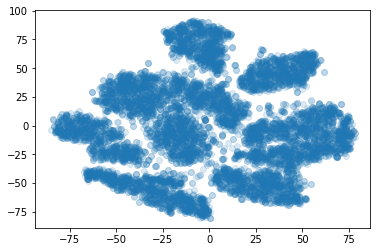

In [16]:
# plot data compressed by t-SNE
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], alpha=0.15)
plt.show()

#### Use a scatterplot with 10 different colors to represent each image's target class. 

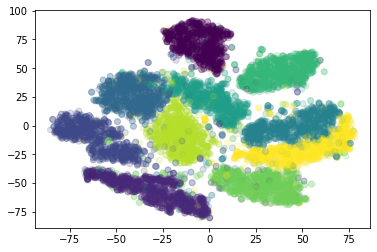

In [17]:
# plot result with colors based on target class
colors = [int(x)/10 for x in y_test] # convert labels to RGB specification

plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=colors, alpha=0.18)
plt.show()

#### Separately, instead of using t-SNE,  using PCA to reduce down to two dimensions, and compare the resulting visualizations. 

In [18]:
# PCA to reduce test set to 2D
X_reduced_pca = PCA(n_components=2).fit_transform(X_test)

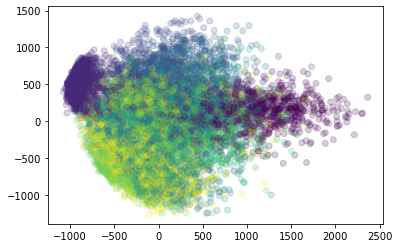

In [19]:
# plot data compressed by PCA
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=colors, alpha=0.2)
plt.show()

The targets are much more clear when using t-SNE visualization.

#### Use a scatterplot with 5 different colors to represent each image's target class for odd numbers.

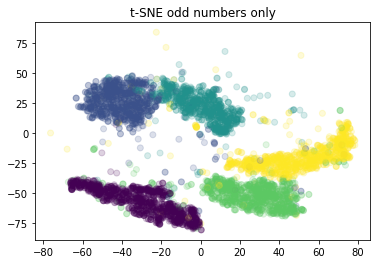

In [32]:
odd_colors = []
x_odd = []
y_odd = []

for i in range(len(y_test)):
    
    if int(y_test[i]) % 2 == 1:
        
        odd_colors.append(int(y_test[i])/10)
        x_odd.append(X_reduced_tsne[i,0])
        y_odd.append(X_reduced_tsne[i,1])
        
plt.scatter(x_odd, y_odd, c=odd_colors, alpha=0.18)
plt.title("t-SNE odd numbers only")
plt.show()

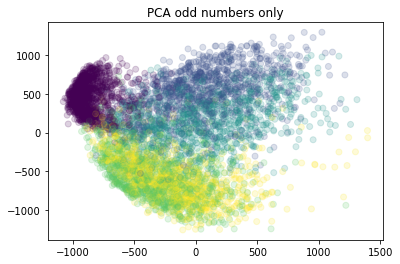

In [29]:
odd_colors = []
X_odd = []
y_odd = []

for i in range(len(y_test)):
    
    if int(y_test[i]) % 2 == 1:
        
        odd_colors.append(int(y_test[i])/10)
        x_odd.append(X_reduced_pca[i,0])
        y_odd.append(X_reduced_pca[i,1])
        
plt.scatter(x_odd, y_odd, c=odd_colors, alpha=0.18)
plt.title("PCA odd numbers only")
plt.show()

#### Try PCA first to reduce  the dataset’s dimensionality, with an explained variance ratio of 85% and then t-SNE . Using a scatterplot using 5 different colors to represent each image's target class for odd numbers.

In [38]:
pca_85 = PCA(n_components=0.85)
X_pca_85 = pca_85.fit_transform(X_test)

In [52]:
tsne = TSNE(n_components=2, init="random", learning_rate="auto")
X_pca85_tsne = tsne.fit_transform(X_pca_85)

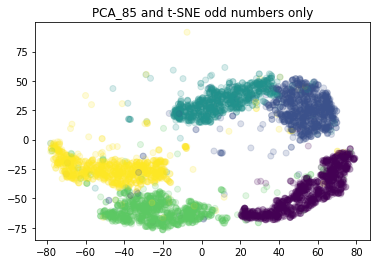

In [53]:
odd_colors = []
x_odd = []
y_odd = []

for i in range(len(y_test)):
    
    if int(y_test[i]) % 2 == 1:
        
        odd_colors.append(int(y_test[i])/10)
        x_odd.append(X_pca85_tsne[i,0])
        y_odd.append(X_pca85_tsne[i,1])
        
plt.scatter(x_odd, y_odd, c=odd_colors, alpha=0.18)
plt.title("PCA_85 and t-SNE odd numbers only")
plt.show()